#Task I: Setup, Data Importation and Preparation

##A. Header

Title: K-Means Clustering (KMC) and Principal Components Analysis (PCA)

Author: Abdulrahman Abed

Date: 04/8/2022

##B. Packages & Dataset

In [ ]:
# Mathematics and Statistics Packages
import numpy as np
import pandas as pd
import random
import itertools

# Graphical Packages
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.colors import ListedColormap

# Data Preparation Packages
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Modeling Packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Evaluation Packages
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Suppress Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Data_Sets/winequality.csv')

##C. Overall Structure and Summary

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


##D. Convert & Sort Target

In [ ]:
integer_columns_list = list(df.select_dtypes(include='int64').columns)
df[integer_columns_list] = df[integer_columns_list].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   category
dtypes: category(1), float64(11)
memory usage: 565.2 KB


In [ ]:
df['quality'], unique_quality_values = pd.factorize(df['quality'],sort=True)

##E. Standard Scaler

In [ ]:
scaled_wine_df = pd.DataFrame(StandardScaler().fit_transform(df.drop('quality',axis=1)),columns=df.drop('quality',axis=1).columns)

In [ ]:
scaled_wine_df['quality'] = df['quality']

##F. Resulting Dataframe

In [ ]:
scaled_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
scaled_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6.497000e+03,6497.000000
mean,1.007471e-15,1.002225e-15,-1.753083e-16,-1.693547e-15,2.863647e-16,1.009232e-15,-9.658103e-16,-4.469840e-15,3.086803e-15,3.102883e-16,-1.131481e-15,2.818378
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.873255
min,-2.634589e+00,-1.577330e+00,-2.192833e+00,-1.018034e+00,-1.342639e+00,-1.663583e+00,-1.941780e+00,-2.530192e+00,-3.100615e+00,-2.091935e+00,-2.089350e+00,0.000000
25%,-6.289329e-01,-6.661613e-01,-4.723335e-01,-7.657978e-01,-5.147986e-01,-7.620742e-01,-6.855323e-01,-7.859527e-01,-6.748622e-01,-6.805919e-01,-8.316152e-01,2.000000
50%,-1.660892e-01,-3.016939e-01,-5.941375e-02,-5.135612e-01,-2.578826e-01,-8.594301e-02,3.990667e-02,6.448888e-02,-5.287424e-02,-1.429373e-01,-1.608231e-01,3.000000
75%,3.738951e-01,3.664962e-01,4.911459e-01,5.584445e-01,2.559494e-01,5.901882e-01,7.122647e-01,7.648525e-01,6.313125e-01,4.619241e-01,6.776670e-01,3.000000
max,6.699425e+00,7.534354e+00,9.231281e+00,1.268682e+01,1.584219e+01,1.456357e+01,5.737257e+00,1.476879e+01,4.923029e+00,9.870879e+00,3.696231e+00,6.000000


In [ ]:
scaled_wine_df.head(25)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,2
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,2
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,3
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,2
6,0.528176,1.581387,-1.779913,-0.807837,0.370134,-0.874763,-1.004018,0.568084,0.506915,-0.478971,-0.915464,2
7,0.065333,1.885110,-2.192833,-0.891916,0.255949,-0.874763,-1.676376,-0.032228,1.066704,-0.411765,-0.412370,4
8,0.451036,1.459898,-2.055193,-0.723758,0.484319,-1.212828,-1.729457,0.701486,0.880108,0.260304,-0.831615,4
9,0.219614,0.973942,0.284686,0.138050,0.427227,-0.762074,-0.243191,1.034993,0.817909,1.806060,0.006875,2


##G.

Our target variable values are numerical and quantifiable, so there was no need to dummy encode.

#Task II: Optimal Cluster Number

##A. Inertia & Silhouette Score Results for 19 Cluster Combinations

In [ ]:
# Initialize Lists
silhouette_list = []
inertia_list = []
model_list = []
cluster_number = np.arange(2,20,1)



# Loop Over Cluster Number
for i in range(2,20):

  # K-Means Clustering
  # Don't Cluster by Target Variable
  # Assign Predicted Cluster as a Column in the Dataframe
  cluster = KMeans(i).fit_predict(scaled_wine_df.drop('quality',axis=1))
  scaled_wine_df['cluster'] = cluster
  
  # Create Dataframe without Dependent Variable and Clustering from Above (only independent variables)
  independent_scaled_wine_df = scaled_wine_df.drop(columns=['quality','cluster'],axis=1)

  # Fit a Model
  model = KMeans(i).fit(independent_scaled_wine_df)
  model_list.append(model)

  # Fit and Predict with a Model
  cluster = KMeans(i).fit_predict(independent_scaled_wine_df)

  # Record the "Intertia" Attribute of the Model (Sum of Squared Distances of Points to their Cluster Center)
  inertia_list.append(model.inertia_)

  # Record the Silhouette Score of the Model
  silhouette = silhouette_score(independent_scaled_wine_df,cluster)
  silhouette_list.append(silhouette)

##B. Plots

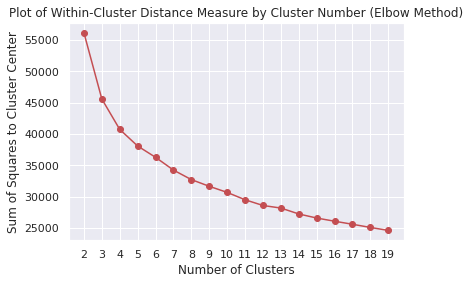

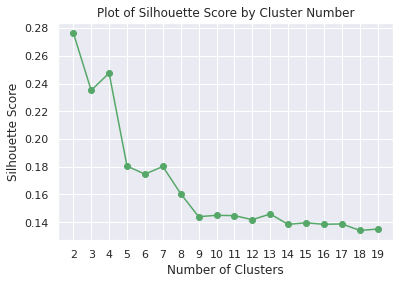

In [ ]:
# Within-Cluster Distances Plot
plt.plot(cluster_number,inertia_list,color='r',marker='o')
plt.xticks(cluster_number)
plt.title('Plot of Within-Cluster Distance Measure by Cluster Number (Elbow Method)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares to Cluster Center')
plt.show()

# Silhouette Score Plot
plt.plot(cluster_number,silhouette_list,color='g',marker='o')
plt.xticks(cluster_number)
plt.title('Plot of Silhouette Score by Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

##C.

In [ ]:
scaled_wine_df.value_counts('quality')

quality
3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
dtype: int64

I think the optimal number of clusters is 4. The inflection in our elbow plot, and the second heighest point in our silhouette plot are both at 4 clusters. The reason I settled with 4 is due to the fact that the value counts of quality are highest at '3','2', and '4'. The rest of the counts were significantly lower, so I thought they should all be grouped together in one cluster, giving us a total of 4 cluster of quality.

#Task III: K-Means Clustering Assignments

##A. KMeans Fit and Predict

###(1) K = 7

In [ ]:
# Fit
kmeans_7 = KMeans(7).fit(independent_scaled_wine_df)
# Predict
cluster = kmeans_7.predict(independent_scaled_wine_df)
scaled_wine_df['cluster'] = cluster

# Find Correct Cluster Permutation
# Initialize
scaled_wine_df['cluster'].replace(to_replace=0,value="A",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=1,value="B",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=2,value="C",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=3,value="D",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=4,value="E",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=5,value="F",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=6,value="G",inplace=True)

# Must assign this to its own dataframe so that the replace function on the cluster column does not continually replace it
alphabet_cluster = pd.DataFrame(data=scaled_wine_df['cluster'])

# Continue Initializations
cluster_number = 7
cluster_permutations = list(itertools.permutations(list(np.arange(0,cluster_number))))
optimal_permutation = ()

# Loop Over Cluster Labels
for item in cluster_permutations:
  # Make Cluster Label Assignment
  scaled_wine_df['cluster'].replace(to_replace="A",value=item[0],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="B",value=item[1],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="C",value=item[2],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="D",value=item[3],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="E",value=item[4],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="F",value=item[5],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="G",value=item[6],inplace=True)

###(2) K = Optimal_K

In [ ]:
# Fit
optimal_k = KMeans(4).fit(independent_scaled_wine_df)
# Predict
cluster = optimal_k.predict(independent_scaled_wine_df)
scaled_wine_df['cluster'] = cluster

# Find Correct Cluster Permutation
# Initialize
scaled_wine_df['cluster'].replace(to_replace=0,value="A",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=1,value="B",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=2,value="C",inplace=True)
scaled_wine_df['cluster'].replace(to_replace=3,value="D",inplace=True)

# Must assign this to its own dataframe so that the replace function on the cluster column does not continually replace it
alphabet_cluster2 = pd.DataFrame(data=scaled_wine_df['cluster'])

# Continue Initializations
cluster_number = 4
cluster_permutations2 = list(itertools.permutations(list(np.arange(0,cluster_number))))
optimal_permutation = ()

# Loop Over Cluster Labels
for item in cluster_permutations2:
  # Make Cluster Label Assignment
  scaled_wine_df['cluster'].replace(to_replace="A",value=item[0],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="B",value=item[1],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="C",value=item[2],inplace=True)
  scaled_wine_df['cluster'].replace(to_replace="D",value=item[3],inplace=True)

##B.

In [ ]:
scaled_wine_df["cluster_7"] = alphabet_cluster

In [ ]:
scaled_wine_df["cluster_optimal"] = alphabet_cluster2

##C.

In [ ]:
scaled_wine_df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster,cluster_7,cluster_optimal
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2,3,F,D
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,2,3,F,D
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,2,3,F,D
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,3,2,G,C
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,2,3,F,D
5,0.142473,1.945855,-2.192833,-0.765798,0.541412,-0.987451,-1.340197,1.034993,1.813090,0.193097,-0.915464,2,3,F,D
6,0.528176,1.581387,-1.779913,-0.807837,0.370134,-0.874763,-1.004018,0.568084,0.506915,-0.478971,-0.915464,2,3,F,D
7,0.065333,1.885110,-2.192833,-0.891916,0.255949,-0.874763,-1.676376,-0.032228,1.066704,-0.411765,-0.412370,4,3,F,D
8,0.451036,1.459898,-2.055193,-0.723758,0.484319,-1.212828,-1.729457,0.701486,0.880108,0.260304,-0.831615,4,3,F,D
9,0.219614,0.973942,0.284686,0.138050,0.427227,-0.762074,-0.243191,1.034993,0.817909,1.806060,0.006875,2,3,G,D


#Task IV: 2-D Scatterplots

##A.

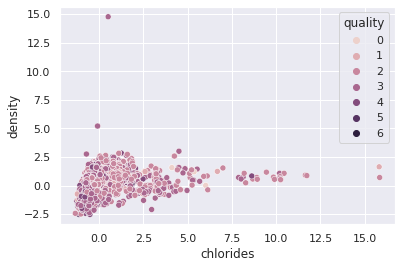

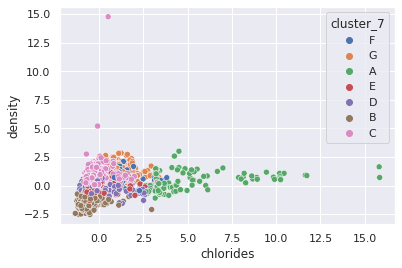

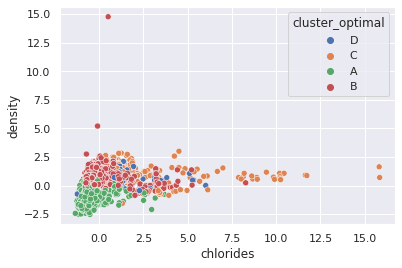

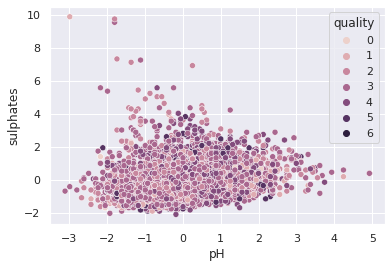

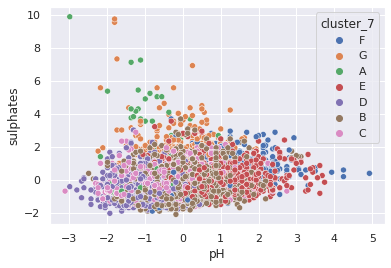

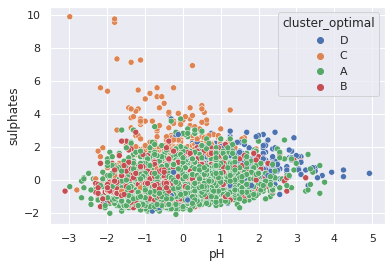

In [ ]:
sns.scatterplot(x='chlorides',y='density',data=scaled_wine_df,hue='quality')
plt.show()

sns.scatterplot(x='chlorides',y='density',data=scaled_wine_df,hue='cluster_7')
plt.show()

sns.scatterplot(x='chlorides',y='density',data=scaled_wine_df,hue='cluster_optimal')
plt.show()

sns.scatterplot(x='pH',y='sulphates',data=scaled_wine_df,hue='quality')
plt.show()

sns.scatterplot(x='pH',y='sulphates',data=scaled_wine_df,hue='cluster_7')
plt.show()

sns.scatterplot(x='pH',y='sulphates',data=scaled_wine_df,hue='cluster_optimal')
plt.show()

##B.

The clusters are not well-separated, there is a lot of overlap and a lack of good separation. None of the clusters stand out as particularly unique in the scatterplots. 2 clusters (D & C) stand out as particularly unique in the optimal_clusters scatterplot (3rd scatterplot)?

#Task V: Boxplots

##A.

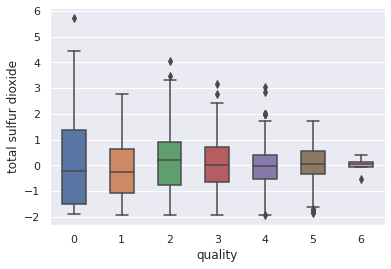

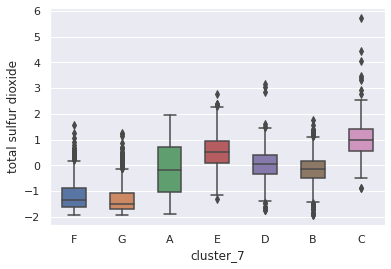

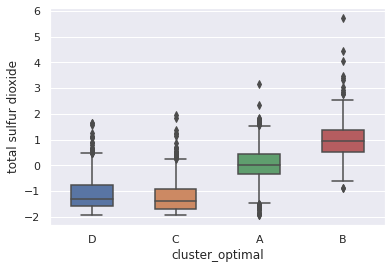

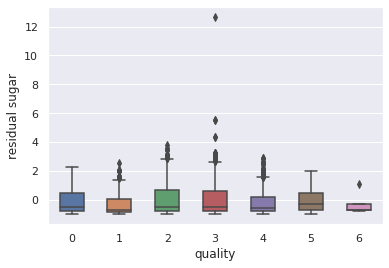

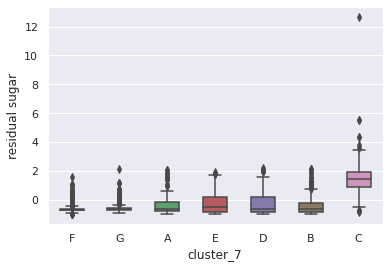

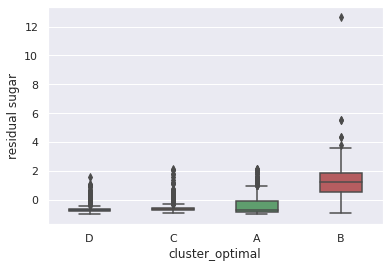

In [ ]:
sns.boxplot(x='quality',y='total sulfur dioxide',data=scaled_wine_df,width=0.5)
plt.show()

sns.boxplot(x='cluster_7',y='total sulfur dioxide',data=scaled_wine_df,width=0.5)
plt.show()

sns.boxplot(x='cluster_optimal',y='total sulfur dioxide',data=scaled_wine_df,width=0.5)
plt.show()

sns.boxplot(x='quality',y='residual sugar',data=scaled_wine_df,width=0.5)
plt.show()

sns.boxplot(x='cluster_7',y='residual sugar',data=scaled_wine_df,width=0.5)
plt.show()

sns.boxplot(x='cluster_optimal',y='residual sugar',data=scaled_wine_df,width=0.5)
plt.show()

##B.

Total sulfur dioxide
  * quality: Bad seperation, all clusters overlapping.
  * cluster_7: Better seperation, but still overlaping on Clusters B, F & G.
  * clusters_optimal:Even better seperation, but still overlaping on Clusters D & C

Residual sugar
  * quality: Worst seperation, all clusters overlapping.
  * cluster_7: Very Bad seperation, all but cluster A overlapping.
  * clusters_optimal: Very Bad seperation, all but cluster A overlapping

Of the features total sulfur dioxide and residual sugar, the quality classes & cluster most similar are clusters_optimal & quality. The most dissimilar based on the two chosen features were cluster_7.

#Task VI: Principal Components Analysis (PCA)

##A. Fit

In [ ]:
pca = PCA(n_components=11, svd_solver='full')
pca.fit(independent_scaled_wine_df)

NameError: ignored

##B. Display Numpy Arrays

In [ ]:
pca.explained_variance_ratio_

array([0.2754426 , 0.22671146, 0.14148609, 0.08823201, 0.06544317,
       0.05521016, 0.04755989, 0.04559184, 0.03063855, 0.02069961,
       0.00298462])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2754426 , 0.50215406, 0.64364015, 0.73187216, 0.79731533,
       0.85252548, 0.90008537, 0.94567722, 0.97631577, 0.99701538,
       1.        ])

##C. Cumulative Explained Variance by Principal Component

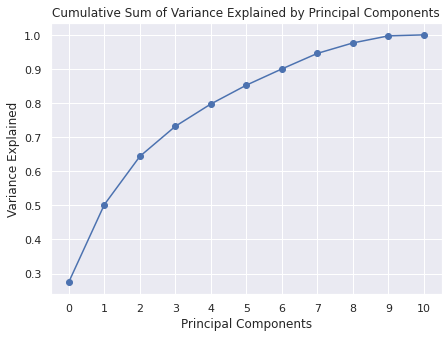

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(0,11),np.cumsum(pca.explained_variance_ratio_),color='b',marker='o')
plt.xticks(np.arange(0,11))
plt.title('Cumulative Sum of Variance Explained by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

##D. Principal Components df

In [ ]:
principal_components_df = pd.DataFrame(pca.components_)

principal_components_df.index = ['PC' + x for x in list(map(str,list(np.arange(0,11))))]

principal_components_df.columns = independent_scaled_wine_df.columns
principal_components_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC0,-0.238799,-0.380757,0.152388,0.345920,-0.290113,0.430914,0.487418,-0.044937,-0.218686,-0.294135,-0.106437
PC1,0.336355,0.117550,0.183299,0.329914,0.315258,0.071933,0.087266,0.584037,-0.155869,0.191716,-0.465058
PC2,0.434301,-0.307259,0.590570,-0.164688,-0.016679,-0.134224,-0.107462,-0.175606,-0.455324,0.070042,0.261101
PC3,-0.164346,-0.212785,0.264300,-0.167443,0.244744,0.357279,0.208420,-0.072725,0.414551,0.640536,0.106803
PC4,0.147480,-0.151456,0.155349,0.353362,-0.614391,-0.223532,-0.158134,0.306561,0.453376,0.136577,0.188892
PC5,0.204554,0.492143,-0.227634,0.233478,-0.160976,0.340051,0.151277,-0.018743,-0.296579,0.296926,0.518378
PC6,-0.283079,-0.389160,-0.381285,0.217976,-0.046068,-0.299363,-0.138910,-0.046759,-0.418907,0.525343,-0.104103
PC7,-0.401236,0.087435,0.293412,0.524873,0.471517,-0.207808,-0.128621,-0.004831,0.028643,-0.165818,0.399234
PC8,0.344057,-0.496933,-0.402689,0.108003,0.296444,0.366656,-0.320696,0.112880,0.127837,-0.207764,0.251890
PC9,0.281268,-0.152177,-0.234463,0.001373,0.196630,-0.480243,0.713663,0.003908,0.141311,-0.045959,0.205053


##E.

The first 5 principal components are needed to explain approximately 80% of the variation in data.

##F. Fit & Transform

In [ ]:
# Make a Dataframe Using the First 5 Principal Components
# Assign PCA Model
pca_5 = PCA(5)
# Fit the Model and Transform the Data
pca_scaled_wine = pca_5.fit_transform(independent_scaled_wine_df)
# Convert to a Pandas Dataframe
pca_scaled_wine_df = pd.DataFrame(pca_scaled_wine)
# Assign Column Names by the Principal Component Index
pca_scaled_wine_df.columns = ['PC' + x for x in list(map(str,list(np.arange(0,5))))]

##G. KMeans Model

In [ ]:
# Assign a 7-Means Clustering Model; Fit and Predict with it on the Corresponding Recently Created Dataframe; Add a Column to the Dataframe for these Predictions
pca_scaled_wine_df['predicted_cluster'] = KMeans(7).fit_predict(pca_scaled_wine_df)

In [ ]:
pca_scaled_wine_df

,PC0,PC1,PC2,PC3,PC4,predicted_cluster
0,-3.205996,0.416523,-2.722237,-0.796778,0.202877,0
1,-3.039051,1.107462,-2.046952,-0.770225,-1.322655,0
2,-3.071893,0.878964,-1.742580,-0.802257,-0.762112,0
3,-1.571262,2.112545,2.592917,-0.292785,0.604701,6
4,-3.205996,0.416523,-2.722237,-0.796778,0.202877,0
...,...,...,...,...,...,...
6492,-0.062824,-1.934205,0.223912,0.189443,0.000146,2
6493,1.866989,0.524431,-0.431798,0.183000,-0.518028,4
6494,0.571133,-0.722662,0.091469,-0.939670,-1.262008,5
6495,0.090052,-3.545780,0.141195,-0.055725,0.208807,2


##H. 2-D Scatter Plot

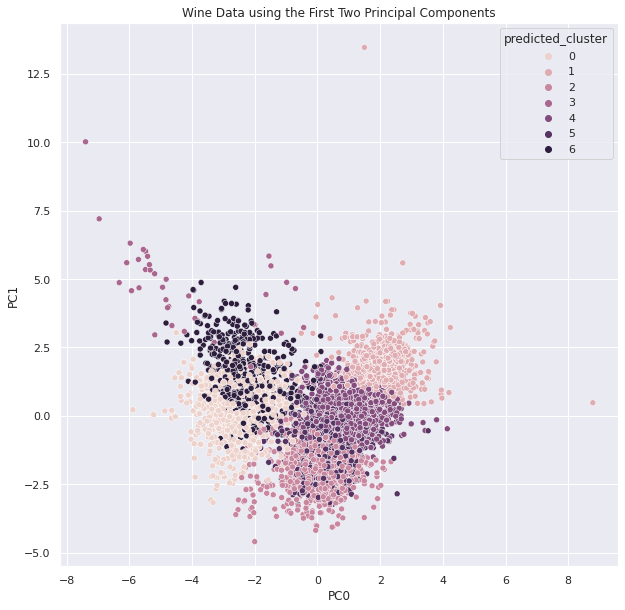

In [ ]:
# Make a 2-D Scatter Plot using the First Two Principal Components (PC0 and PC1)
sns.set(rc={"figure.figsize":(10,10)})
sns.scatterplot(x="PC0",y="PC1",data=pca_scaled_wine_df,hue='predicted_cluster')
plt.title("Wine Data using the First Two Principal Components")
plt.show()

##I. 3-D Scatter Plot

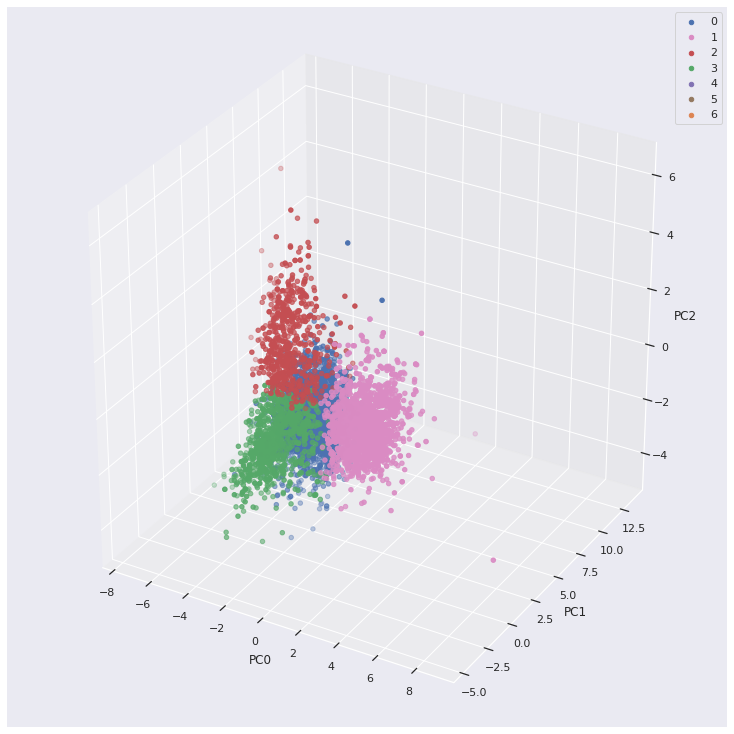

In [ ]:
# Scatter Plot of Clusters by First Three Principal Components (PC0, PC1, and PC2)
# Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)
# Plot (loop over cluster values)
for index in pca_scaled_wine_df.predicted_cluster.unique():
  sc = ax.scatter(pca_scaled_wine_df['PC0'][scaled_wine_df.cluster==index],
                  pca_scaled_wine_df['PC1'][scaled_wine_df.cluster==index],
                  pca_scaled_wine_df['PC2'][scaled_wine_df.cluster==index],
                  label=index)
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
# Legend
handles, labels = ax.get_legend_handles_labels()
# Sort Both the Labels and Handles by the Labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)
# Display
plt.show()

##J.

We have been more successful in visualizing the clusters by applying dimensionally-reduced PCA than we were when using our best K-Means models without applying PCA. Increasing D would not improve the quality of our clustering because it would add too many clusters, leading us to accumulate noise and complexity, our plots would become too converged to understand. By applying dimensionally-reduced PCA we find our sweetspot where we have just enough dementions to visualize 80% of our data clearly. Too many dimentions and we have too many clusters to group data to comprehensively, too little over-generalizes clusters that could be more accurate.

#Task VII: IPYNB and HTML Files

##A & B.

In [ ]:
%%shell
 jupyter nbconvert --to html Assignment9_Abed_Abdulrahman.ipynb

[NbConvertApp] Converting notebook Assignment9_Abed_Abdulrahman.ipynb to html
[NbConvertApp] Writing 1258094 bytes to Assignment9_Abed_Abdulrahman.html
